# Part 1 
First create a file with your python module. This is where you should put your functions to be used in the notebook.

File is called assigment3Modules and is referred to as module in the rest of this assignment

# Part 2


In [1]:
import assigment3Modules as module
import matplotlib.pyplot as plt
import numpy as np


cph_data = module.read_csv_to_numpy_array("befkbhalderstatkode.csv")
cph_data.shape

(542517, 5)

# Part 3
Third create a function that can extract the number of all the citizens from native english speaking countries and from non english speaking countries. How many are there of each? (hint remember that with python you can return multiple values from a function).

In [2]:
eng_amount, non_eng_amount = module.find_eng_and_non_eng_speaking_countries(cph_data)
print("Eng",eng_amount, ": Non Eng",non_eng_amount)

Eng 9053 : Non Eng 571242


# Part 4
Now create another function that can take 2 arguments:
1: the dataset in the form of a 2dimensional data array where y=data rows and x=[year, area, age nationality, amount].
2: the mask in the form: data[:,3] == 5120 to find swedish or data[:,0] == 1999 to filter on year
the return value must be the filtered dataset.

In [3]:
mask = cph_data[:,3] == 5120
module.filter(cph_data, mask)

array([[2015,    1,    0, 5120,    4],
       [2015,    1,    1, 5120,    4],
       [2015,    1,    2, 5120,    3],
       ...,
       [1992,   99,   53, 5120,    1],
       [1992,   99,   54, 5120,    1],
       [1992,   99,   55, 5120,    1]], dtype=uint64)

# Part 5
Create another function that can take 2 arguments:
a dataset with same characteristics as above and
a value for the x-axis (either year, area, age or nationality)
return value should be the accumulated population for all x-values.
hint: if year is chosen for x then y is all accumulated amounts from all areas, ages and nationalities.

In [4]:
module.filter_sum(cph_data, module.Data_Picker.YEAR)

1087585500.0

# Part 6
Create Illustration 1: In your notebook use the above function and create a 2d array of year as x and accumulated amount as y:
create a line graph of the population change over time for all of Copenhagen

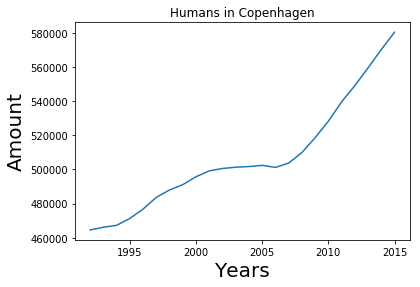

In [5]:
year_amount = module.get_amount_over_year(cph_data)

plt.figure()
plt.title("Humans in Copenhagen")
plt.xlabel("Years", fontsize=20)
plt.ylabel("Amount", fontsize=20)
plt.plot(year_amount.keys(), year_amount.values())

# Part 7 
Create illustration 2: In your notebook use your module to create a dataset where development of all German citizens can be shown over time

<BarContainer object of 24 artists>

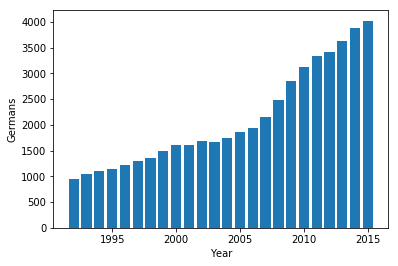

In [6]:
german_data = module.country_over_time(cph_data, 5180)

plt.figure()
plt.xlabel("Year")
plt.ylabel("Germans")
plt.bar(german_data.keys(), german_data.values())

# Part 8
Create illustration 3: Show a bar plot of all the 18-25 year old in the different areas of copenhagen and in the same plot show (in a different color) all 60-67 year old in the different areas.

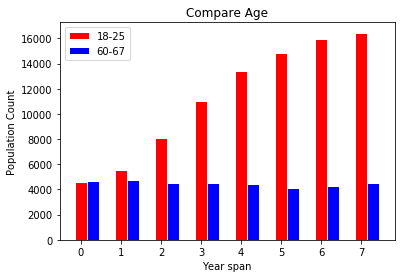

In [7]:
year_18_to_25 = module.get_data_by_age(cph_data, 18, 25)
year_60_to_67 = module.get_data_by_age(cph_data, 60, 67)

barWidth = 0.3
r1 = np.arange(len(year_18_to_25.values()))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, year_18_to_25.values(), label="18-25", color='red', width=barWidth, edgecolor='white')
plt.bar(r2, year_60_to_67.values(), label="60-67", color='blue', width=barWidth, edgecolor='white')

plt.title("Compare Age")
plt.xlabel("Year span")
plt.ylabel("Population Count")
plt.legend()



# Part 9
Create illustration 4: show a pie chart of age groups (0-10, 10-20, 20-30 ...) in Østerbro part of Copenhagen. create another similar piechart for Vesterbro.


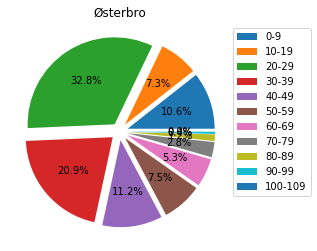

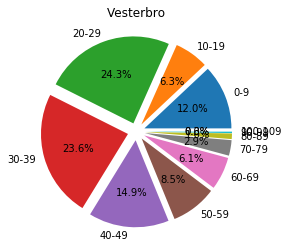

In [8]:
area_code = 3
# Creates a list of age intervals
age_group = [[x * 10 + y for y in range(10)] for x in range(11)]
age_group_dict = module.create_age_group_dict(cph_data, age_group, area_code)

# PLOT
plt.figure()

labels, explode = module.create_labels_and_explode(age_group_dict)

plt.title("Østerbro")
plt.pie(age_group_dict.values(),
        autopct='%1.1f%%', explode=explode)
plt.legend(labels=labels, bbox_to_anchor=(1, 1))

# Part 9.2

area_code = 4
age_group = [[x * 10 + y for y in range(10)] for x in range(11)]
age_group_dict = module.create_age_group_dict(cph_data, age_group, area_code)

# PLOT
plt.figure()

labels, explode = module.create_labels_and_explode(age_group_dict)

plt.title("Vesterbro")
plt.pie(age_group_dict.values(),
        labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()
